#### Indexación espacial con H3 (Hierarchical Hexagonal Geospatial Indexing System)
Proceso de carga de datos, transformación a H3 y devolución en geodataframe

In [16]:
# cargar las librerías

import matplotlib.pyplot as plt
import matplotlib
import h3
import pandas as pd 
import geopandas as gpd
import folium
import branca.colormap as cm
from shapely.geometry import Point
import shapely

In [17]:
# cargar los geodataframe desde su directorio

barrios = gpd.read_file(r"C:\Users\UserMCR\Desktop\Agustín\censo2022\Proyecto\GeoPandasOptimizado\4326\barrios.shp")
radios = gpd.read_file(r"C:\Users\UserMCR\Desktop\Agustín\censo2022\Proyecto\GeoPandasOptimizado\4326\radios.shp")
union = gpd.read_file(r"C:\Users\UserMCR\Desktop\Agustín\censo2022\Proyecto\proyecto_avanzado\union2\union2.shp")

In [18]:
radios.head(1)

,area,perimetro,provincia,dpto,frac,radio,tipo,link,pob2022,viv2022,nombre,geometry
0,1983406.875,9684.93,26,021,07,01,U,260210701,329.0,123.0,None,"POLYGON ((-67.50260 -45.73632, -67.50264 -45.7..."


In [19]:
# seleccionar el geodataframe

geo = radios.geometry[0]
type(geo)

shapely.geometry.polygon.Polygon

In [20]:
# activar la función de la librería de shapely

shapely.geometry.multipolygon.MultiPolygon

shapely.geometry.multipolygon.MultiPolygon

In [21]:
# pedir a (h3) los códigos de celda (valores que representan el centroide de cada celda)
# para cada polígono del geodataframe

h3.geo_to_cells(geo, res = 10)

['8acf9e00dd4ffff',
 '8acf9e00d8b7fff',
 '8acf9e00caeffff',
 '8acf9e00c217fff',
 '8acf9e00dda7fff',
 '8acf9e00dcf7fff',
 '8acf9e00ca97fff',
 '8acf9e00c26ffff',
 '8acf9e00cb9ffff',
 '8acf9e00dc9ffff',
 '8acf9e00dc47fff',
 '8acf9e00d527fff',
 '8acf9e00c05ffff',
 '8acf9e00db97fff',
 '8acf9e00d107fff',
 '8acf9e00c31ffff',
 '8acf9e00da37fff',
 '8acf9e00c237fff',
 '8acf9e00d8d7fff',
 '8acf9e00c377fff',
 '8acf9e00dd6ffff',
 '8acf9e00cab7fff',
 '8acf9e00ca5ffff',
 '8acf9e0764dffff',
 '8acf9e00dc67fff',
 '8acf9e00dc0ffff',
 '8acf9e00dbb7fff',
 '8acf9e00db1ffff',
 '8acf9e00db5ffff',
 '8acf9e00db07fff',
 '8acf9e00c35ffff',
 '8acf9e00db77fff',
 '8acf9e00d127fff',
 '8acf9e00c307fff',
 '8acf9e00d567fff',
 '8acf9e00d50ffff',
 '8acf9e00c257fff',
 '8acf9e00d8f7fff',
 '8acf9e00dd8ffff',
 '8acf9e00dc27fff',
 '8acf9e00cad7fff',
 '8acf9e00d89ffff',
 '8acf9e00c14ffff',
 '8acf9e00ca1ffff',
 '8acf9e00dcdffff',
 '8acf9e00dc87fff',
 '8acf9e00dc2ffff',
 '8acf9e00dcd7fff',
 '8acf9e00c047fff',
 '8acf9e00c327fff',


In [22]:
plot_cells(h3.geo_to_cells(geo, res = 10))

NameError: name 'plot_cells' is not defined

In [39]:
# convertir todas las geometrías de un geodatafame a celdas

cell_column = radios.geometry.apply(lambda x: h3.geo_to_cells(x, res = 11))
cell_column

0      [8bcf9e00c225fff, 8bcf9e00dba0fff, 8bcf9e00d12...
1      [8bcf9e000ce6fff, 8bcf9e029794fff, 8bcf9e0056a...
2      [8bcf9e141950fff, 8bcf9eba2c9dfff, 8bcf9eb9e16...
3      [8bcf9e002d12fff, 8bcf9e015368fff, 8bcf9e00648...
4      [8bcf9e02e481fff, 8bcf9e02eda3fff, 8bcf9e02325...
                             ...                        
297    [8bcf9e1750abfff, 8bcf9e175088fff, 8bcf9e1750a...
298    [8bcf9e1603aafff, 8bcf9e160343fff, 8bcf9e160ac...
299    [8bcf9e175ab4fff, 8bcf9e175ab0fff, 8bcf9e175aa...
300    [8bcf9e175a75fff, 8bcf9e175a13fff, 8bcf9e162d3...
301    [8bcf9e021499fff, 8bcf9e0214aefff, 8bcf9e023b8...
Length: 302, dtype: object

In [40]:
# convertir celdas a "geo objetos"

shape_column = cell_column.apply(h3.cells_to_h3shape)
shape_column

# note that the column now consists of LatLngPolt and LatLngMultiPoly objects

0                                    <LatLngPoly: [498]>
1                            <LatLngPoly: [2124/(318,)]>
2                          <LatLngPoly: [8178/(18, 30)]>
3                                    <LatLngPoly: [276]>
4      (<LatLngPoly: [1110]>, <LatLngPoly: [18]>, <La...
                             ...                        
297    (<LatLngPoly: [30]>, <LatLngPoly: [30]>, <LatL...
298                                  <LatLngPoly: [324]>
299                                   <LatLngPoly: [60]>
300                                   <LatLngPoly: [96]>
301                                  <LatLngPoly: [120]>
Length: 302, dtype: object

In [41]:
shape_column[0]

<LatLngPoly: [498]>

In [42]:
shape_column[1]

<LatLngPoly: [2124/(318,)]>

In [43]:
# ahora, si asignamos df.geometry = shape_column, nuestros objetos H3Shape 
# se van a convertir automáticamente a objetos polígono y multipolígono 
# de shapely vía geo_interface

radios.geometry = shape_column
radios.geometry

0      POLYGON ((-67.46894 -45.72967, -67.46884 -45.7...
1      POLYGON ((-67.37738 -45.73578, -67.37760 -45.7...
2      POLYGON ((-67.50327 -45.73590, -67.50349 -45.7...
3      POLYGON ((-67.37925 -45.73977, -67.37956 -45.7...
4      MULTIPOLYGON (((-67.43650 -45.76225, -67.43640...
                             ...                        
297    MULTIPOLYGON (((-67.51269 -45.89103, -67.51278...
298    POLYGON ((-67.56185 -45.89258, -67.56207 -45.8...
299    POLYGON ((-67.52192 -45.89488, -67.52171 -45.8...
300    POLYGON ((-67.52171 -45.89507, -67.52192 -45.8...
301    POLYGON ((-67.43082 -45.78949, -67.43073 -45.7...
Name: geometry, Length: 302, dtype: geometry

In [44]:
# pido el tipo de objeto dentro de la columna geometría del gdf radios
type(radios.geometry[0])

shapely.geometry.polygon.Polygon

In [45]:
# tomamos algunos objetos con geometría shapely, los convertimos a celdas H3
# y volvimos a convertirlos a objetos con geométria shapely en un GDF de geopandas
# para visualizar los resultados podemos usar

plot_df(radios, column = "pob2022")

NameError: name 'plot_df' is not defined

<Axes: >

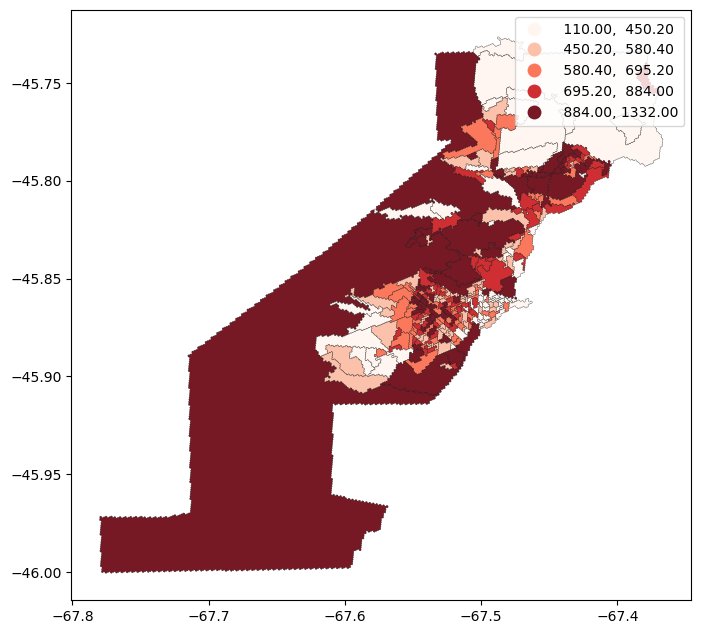

In [46]:
radios.plot("pob2022",
            figsize = (8, 8),
            legend = True,
            scheme = "quantiles",
            cmap = "Reds",
            alpha = 0.9,
            edgecolor = "black",
            linewidth = 0.2)

In [47]:
radios.explore("pob2022",
               scheme = "quantiles",
               cmap = "gist_heat_r")

In [48]:
import folium 
from pyproj import crs
import geopandas as gpd
import matplotlib.pyplot as plt

In [49]:
m = folium.Map(radios)

AttributeError: 'GeoDataFrame' object has no attribute 'tolist'

In [50]:
# descargo el archivo ya transformado a la carpeta donde está guardado el repositorio

radios.to_file("radios_h3_res11.shp")

In [38]:
radios.head(1)

,area,perimetro,provincia,dpto,frac,radio,tipo,link,pob2022,viv2022,nombre,geometry
0,1983406.875,9684.93,26,021,07,01,U,260210701,329.0,123.0,None,"POLYGON ((-67.46919 -45.72882, -67.47003 -45.7..."
